Laboratorio 3

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('train.csv')


Analisis exploratorio

In [27]:
# Información básica sobre el dataset
data.info()

# Estadísticas descriptivas
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Division de entrenamiento y prueba

In [ ]:
# División de datos
X = data.drop('label', axis=1).values
y = data['label'].values

Un modelo de red neuronal del ejercicio 1

In [29]:
# Normalizar las características (píxeles) en el rango [0,1]
X = X / 255.0

# Codificar las etiquetas en formato one-hot
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)

accuracy

C:\Users\jorge\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2989 - accuracy: 0.9107 - val_loss: 0.1715 - val_accuracy: 0.9487
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1249 - accuracy: 0.9621 - val_loss: 0.1423 - val_accuracy: 0.9558
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 0.1232 - val_accuracy: 0.9639
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.1163 - val_accuracy: 0.9656
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.1017 - val_accuracy: 0.9707
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0393 - accuracy: 0.9862 - val_loss: 0.1029 - val_accuracy: 0.9701
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.1047 - val_accuracy:

0.9725000262260437

Naive Bayes

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Gaussian Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = nb_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Gaussian Naive Bayes: {accuracy * 100:.2f}%")


Accuracy of Gaussian Naive Bayes: 56.58%


La matriz de confusión de cada uno y la explicación del desempeño de cada uno

263/263 [==============================] - 0s 1ms/step


<Figure size 1000x800 with 0 Axes>

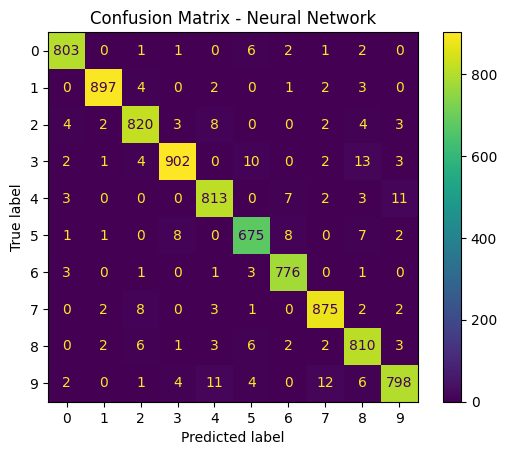

<Figure size 1000x800 with 0 Axes>

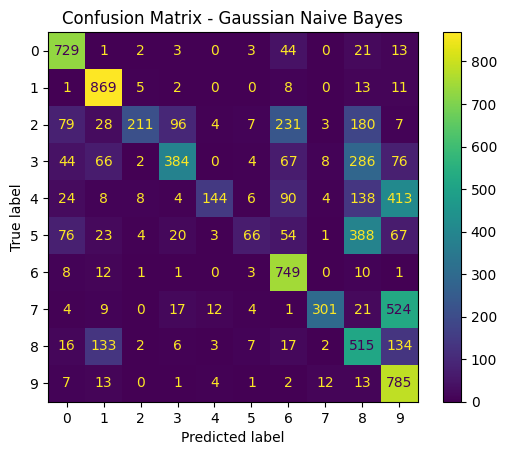

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Matriz de Confusión para la Red Neuronal:
# Predecir en el conjunto de prueba
nn_predictions = model.predict(X_test)

# Convertir predicciones de one-hot a formato de etiqueta (1D)
nn_pred_labels = np.argmax(nn_predictions, axis=1)

# Generar matriz de confusión
nn_conf_matrix = confusion_matrix(y_test, nn_pred_labels)

# Mostrar la matriz de confusión
plt.figure(figsize=(10,8))
ConfusionMatrixDisplay(nn_conf_matrix, display_labels=range(10)).plot(values_format="d")
plt.title('Confusion Matrix - Neural Network')
plt.show()

# 2. Matriz de Confusión para Gaussian Naive Bayes:
# Generar matriz de confusión
gnb_conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(10,8))
ConfusionMatrixDisplay(gnb_conf_matrix, display_labels=range(10)).plot(values_format="d")
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()
